In [1]:
# Importo librerias necesarias
import warnings
warnings.filterwarnings("ignore")
import numpy as np # librería para poder usar arreglos
import pandas as pd # librería para poder usad DataFrames (tablas)
import plotly.express as px
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot
import sklearn # librería para poder usar modelos de machine learning
import numpy as np
import pickle
import math as mth

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.decomposition as sk # to compute PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression


In [3]:
def get_data():
    """
    Funcion para obtener los datos del archivo covid.csv
    """

    dataSet = pd.read_csv("covid.csv", header=0)
    dataSet.set_index('date', inplace=True)
    dataSet.index = pd.to_datetime(dataSet.index,format='%d/%m/%y',errors='ignore')

    return dataSet

def infoData(dataSet):
    """
    Funcion para obtener datos generales
    """

    print(dataSet.head(10))
    print("")
    print(dataSet.info())
    print("")
    print(dataSet.isnull().sum())
    print("")

In [4]:
data = get_data()
infoData(data)


            AGUASCALIENTES  BAJA CALIFORNIA  BAJA CALIFORNIA SUR  CAMPECHE  \
date                                                                         
2020-02-26               0                0                    0         0   
2020-02-27               0                0                    0         0   
2020-02-28               0                0                    0         0   
2020-02-29               0                0                    0         0   
2020-03-01               0                0                    0         0   
2020-03-02               0                0                    0         0   
2020-03-03               0                0                    0         0   
2020-03-04               0                0                    0         0   
2020-03-05               0                0                    0         0   
2020-03-06               0                0                    0         0   

            CHIAPAS  CHIHUAHUA  DISTRITO FEDERAL  COAHUILA  COL

In [5]:
def preprocess_data(dataSet):
    """
    Funcion para el preprocesamiento de datos
    """

    local_dataSet = dataSet.dropna()
    columns_list = dataSet.columns.tolist()
    min_max_scaler = preprocessing.MinMaxScaler() # standardScaler
    min_max_scaler.fit(local_dataSet)
    new_dataSet = min_max_scaler.transform(local_dataSet)

    new_dataSet = pd.DataFrame(np.round(new_dataSet,4), columns=columns_list)
    new_dataSet.index = local_dataSet.index

    return new_dataSet

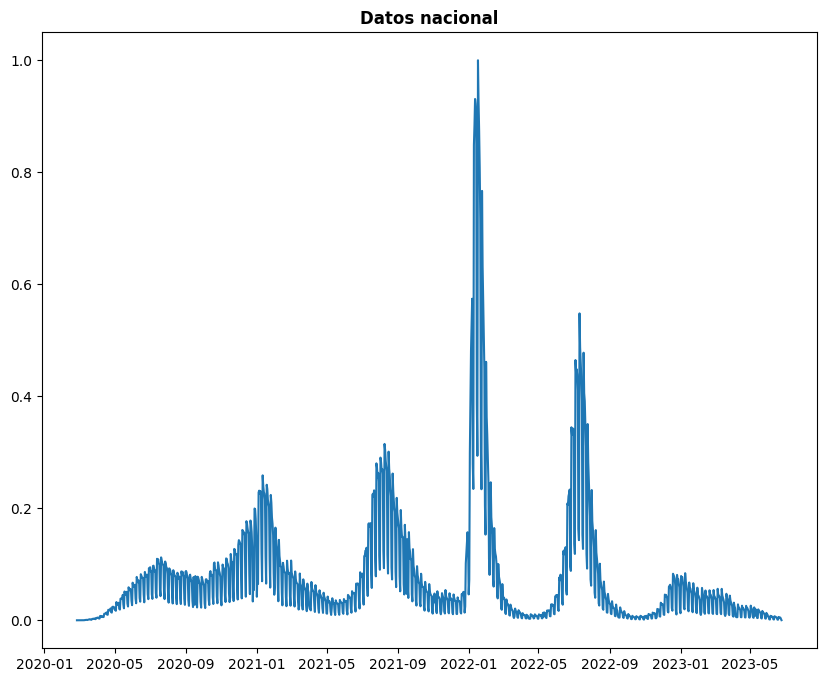

In [6]:
preprocessData = preprocess_data(data)

plt.figure(figsize=(10, 8))
plt.plot(preprocessData['Nacional'])
plt.title('Datos nacional', fontweight='bold')
plt.show()

In [7]:
def pca_Transformation(dataSet):
    features = dataSet
    features = features.drop(['Nacional'], axis=1)

    # principal components analysis
    pca = sk.PCA(n_components=3)
    principalComponents = pca.fit_transform(features)
    principalComp = pd.DataFrame(data = principalComponents,
                                 columns = ['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3'])
    principalComp.set_index(dataSet.index,inplace = True, drop=True)
    principalComp['Nacional'] = dataSet['Nacional']
    cols = principalComp.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    principalComp = principalComp[cols]

    print("==========================================================")
    print("                 PCA ANALYSIS")
    print("----------------------------------------------------------")
    print(principalComp)
    print("\n")

    varRatio = (pca.explained_variance_ratio_)*100
    data = {'P. Comp. 1':varRatio[0],'P. Comp. 2':varRatio[1],'P. Comp. 3':varRatio[2]}
    dfVar = pd.DataFrame(data, index=['Exp Var Ratio %'])
    print(dfVar)
    print("\n")

    return principalComp

In [8]:
pcaData = pca_Transformation(preprocessData)
pcaData.head(1215)

                 PCA ANALYSIS
----------------------------------------------------------
            Nacional  P. Comp. 1  P. Comp. 2  P. Comp. 3
date                                                    
2020-02-26    0.0000   -0.420984   -0.025472   -0.013954
2020-02-27    0.0000   -0.420786   -0.025421   -0.013903
2020-02-28    0.0000   -0.420896   -0.025544   -0.013894
2020-02-29    0.0000   -0.420792   -0.025320   -0.014072
2020-03-01    0.0000   -0.420784   -0.025356   -0.013891
...              ...         ...         ...         ...
2023-06-20    0.0055   -0.385418   -0.023980   -0.031617
2023-06-21    0.0050   -0.389817   -0.025970   -0.026036
2023-06-22    0.0048   -0.394643   -0.029628   -0.022447
2023-06-23    0.0026   -0.401546   -0.021571   -0.028535
2023-06-24    0.0002   -0.419864   -0.024882   -0.014331

[1215 rows x 4 columns]


                 P. Comp. 1  P. Comp. 2  P. Comp. 3
Exp Var Ratio %   81.101835    5.824434    3.614026




,Nacional,P. Comp. 1,P. Comp. 2,P. Comp. 3
date,,,,
2020-02-26,0.0000,-0.420984,-0.025472,-0.013954
2020-02-27,0.0000,-0.420786,-0.025421,-0.013903
2020-02-28,0.0000,-0.420896,-0.025544,-0.013894
2020-02-29,0.0000,-0.420792,-0.025320,-0.014072
2020-03-01,0.0000,-0.420784,-0.025356,-0.013891
...,...,...,...,...
2023-06-20,0.0055,-0.385418,-0.023980,-0.031617
2023-06-21,0.0050,-0.389817,-0.025970,-0.026036
2023-06-22,0.0048,-0.394643,-0.029628,-0.022447


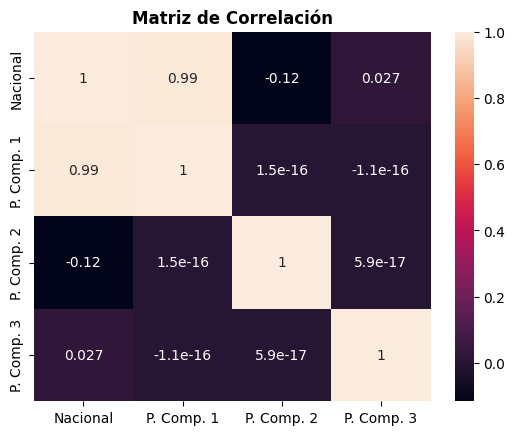

In [44]:
plt.figure()
sns.heatmap(pcaData.corr(), annot=True)
plt.title('Matriz de Correlación', fontweight='bold')
plt.show()
print("")

In [9]:
train_data, test_data = train_test_split(pcaData, test_size=0.25, shuffle=False) #Ya probé con 20, y 30
print(train_data.head(1215))
print("")
print(len(train_data))
print("")
print(test_data.head(1215))
print("")
print(len(test_data))

            Nacional  P. Comp. 1  P. Comp. 2  P. Comp. 3
date                                                    
2020-02-26    0.0000   -0.420984   -0.025472   -0.013954
2020-02-27    0.0000   -0.420786   -0.025421   -0.013903
2020-02-28    0.0000   -0.420896   -0.025544   -0.013894
2020-02-29    0.0000   -0.420792   -0.025320   -0.014072
2020-03-01    0.0000   -0.420784   -0.025356   -0.013891
...              ...         ...         ...         ...
2022-08-20    0.0210   -0.287385    0.002451    0.002460
2022-08-21    0.0187   -0.293690    0.000125    0.009103
2022-08-22    0.0691   -0.015549    0.005202    0.060701
2022-08-23    0.0507   -0.102404    0.010890    0.055541
2022-08-24    0.0462   -0.132828    0.019228    0.046232

[911 rows x 4 columns]

911

            Nacional  P. Comp. 1  P. Comp. 2  P. Comp. 3
date                                                    
2022-08-25    0.0404   -0.171591    0.015264    0.020806
2022-08-26    0.0362   -0.204175    0.005791    0.015538
2

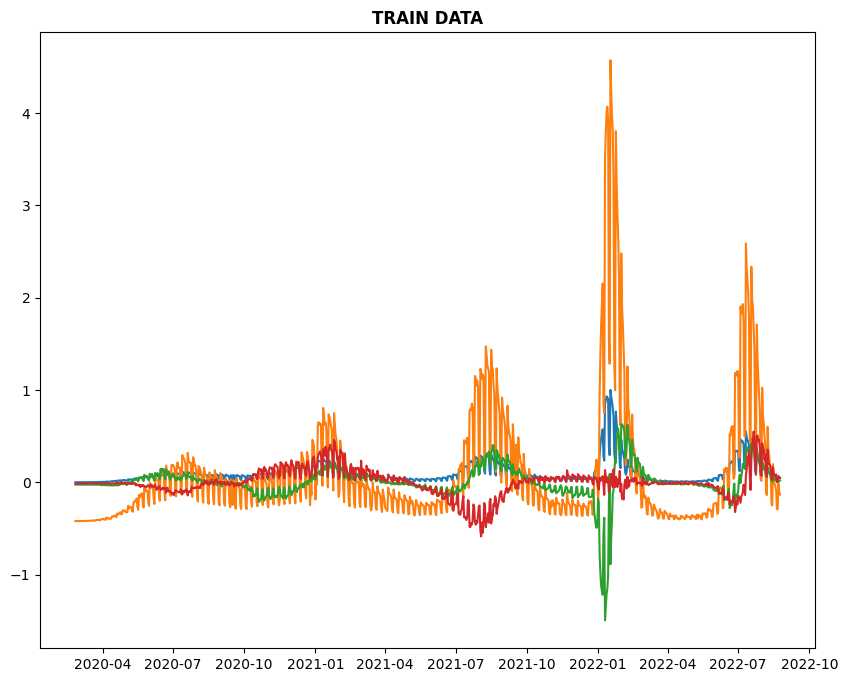

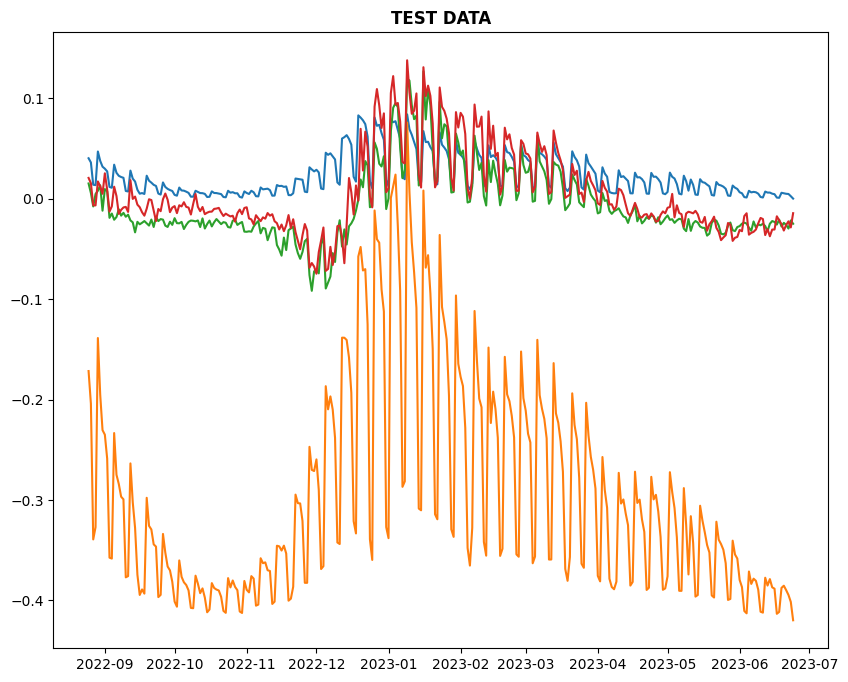

In [10]:
plt.figure(figsize=(10, 8))
plt.plot(train_data)
plt.title('TRAIN DATA', fontweight='bold')
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(test_data)
plt.title('TEST DATA', fontweight='bold')
plt.show()

Modelado del PCA

In [11]:
class Model():
    def __init__(self,model):
        self.model = model
        self.training_data = None
        
    def load_training(self,training_data:pd.Series|list,Expected_results:pd.Series|list[int|float]):
        self.training_data = (training_data,Expected_results)

    def run_training(self):
        if self.training_data is None:
            raise ValueError("No hay datos de entrenamiento cargados. Usa load_training().")
            return False
        self.model.fit(self.training_data[0],self.training_data[1])
        return True
    
    def predict(self,data:pd.Series|list):
        return self.model.predict(data)

    def classification_test_accuracy(self,test_data:pd.Series|list,expected_results:pd.Series|list[int|float]):
        predictions = self.predict(test_data)
        expected_results = list(expected_results)
        results_compare = {"correc_pos":0,"correct_neg":0,"false_pos":0,"false_neg":0}

        for i in range(len(expected_results)):
            is_equal =(predictions[i] == expected_results[i])
            if(is_equal):
                if(predictions[1]):
                    results_compare["correc_pos"] += 1
                else:
                    results_compare["correct_neg"] += 1
            else:
                if(predictions[i]):
                    results_compare["false_pos"] += 1
                else:
                    results_compare["false_neg"] += 1
        
        evals = {"Acur":0,"Press":0,"TPR":0,"F1":0}
        correct = results_compare["correc_pos"]+results_compare["correct_neg"]
        total = len(expected_results)
        try:
            evals["Acur"] = correct/total
        except:
            pass
        try:
            evals["Press"] = results_compare["correc_pos"]/(results_compare["correc_pos"]+results_compare["false_pos"])
        except:
            pass
        try:
            evals["TPR"] = results_compare["correc_pos"]/(results_compare["correc_pos"]+results_compare["false_neg"])
        except:
            pass
        try:
            evals["F1"] = 2*evals["Press"]*evals["TPR"]/(evals["Press"]+evals["TPR"])
        except:
            pass

        
        return evals
    
    def regression_test_accuracy(self,test_data:pd.Series|list,expected_results:pd.Series|list[int|float],k:int|float):
        results = self.model.predict(test_data)
        expected_results = list(expected_results)
        mean = sum(expected_results)/len(expected_results)
        rss = 0
        ssr = 0
        mae = 0
        mape = 0
        for i in range(len(results)):
            rss += (expected_results[i]-results[i])**2
            ssr += (results[i]-mean)**2
            mae += abs(expected_results[i]-results[i]) 
            mape += abs((expected_results[i]-results[i])/expected_results[i])
        if (np.isnan(mape)):
            mape = 0
        tss = rss+ssr
        evaluations = {"TSS":tss,"RSS":rss,"SSR":ssr,"R2":0,"MSE":0,"RMSE":0,
                       "MAPE":0,"MAE":0,"AIC":0,"BIC":0,
                       "TIME SERIES R2":0,"APC":0}
        try:
            evaluations["R2"] = 1-(rss/tss)
        except:
            evaluations["R2"] = np.nan
        try:
            evaluations["MSE"] = rss/len(expected_results)
        except:
            evaluations["MSE"] = np.nan
        try:
            evaluations["MAPE"] = mape*100/len(expected_results)
        except:
            evaluations["MAPE"] = np.nan
        try:
            evaluations["MAE"] = mae/len(expected_results)
        except:
            evaluations["MAE"] = np.nan
        try:
            evaluations["AIC"] = -2*mth.log(rss/len(expected_results))+2*(k)
        except:
            evaluations["AIC"] = np.nan
        try:
            evaluations["BIC"] = (k)*mth.log(len(expected_results))-len(expected_results)*mth.log(rss/len(expected_results))
        except:
            evaluations["BIC"] = np.nan
        try:
            evaluations["APC"] = mth.sqrt(rss)+2*(k)/len(expected_results)
        except:
            evaluations["APC"] = np.nan
        try:
            evaluations["TIME SERIES R2"] = 1-((1-evaluations["R2"])*(len(expected_results)-1)/(len(expected_results)-1-test_data.shape[1]))
        except:
            evaluations["TIME SERIES R2"] = np.nan
        try:
            evaluations["RMSE"] = mth.sqrt(evaluations["MSE"])
        except:
            evaluations["RMSE"] = np.nan
        return evaluations

In [12]:
# === Definición de variables (X e Y) Train y Test===
X_train = train_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]  # Características
Y_train = train_data[['Nacional']]  # Objetivo
X_test = test_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]  # Características
Y_test = test_data[['Nacional']]  # Objetivo

# Definición de variables globales (todos los modelos usan el mismo) para evaluación para Train y Test
n_train = len(Y_train["Nacional"])
print("Número de observaciones (n):", n_train)
p_train = len(X_train.columns)  # Número de variables independientes (componentes principales)
print("Número de variables independientes (p):", p_train)
n_test = len(Y_train["Nacional"])
print("Número de observaciones (n):", n_test)
p_test = len(X_train.columns)  # Número de variables independientes (componentes principales)
print("Número de variables independientes (p):", p_test)

Número de observaciones (n): 911
Número de variables independientes (p): 3
Número de observaciones (n): 911
Número de variables independientes (p): 3


In [13]:
# Decision Tree Regressor
dt_regr = DecisionTreeRegressor()
param_search_dt_regr = {
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_depth': [3, 5, 7, 9, 15, 20, None]
}

# Utilizo GridSearchCV para encontrar los mejores parámetros
# Definir X (característica) y y (objetivo)
X = train_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]
y = train_data[['Nacional']]

grid_search_dt = GridSearchCV(estimator=dt_regr, param_grid=param_search_dt_regr, n_jobs=-1, cv=5, verbose=1)
grid_search_dt.fit(X, y)  # Entreno el modelo con los componentes principales como característica y la columna 'Nacional' como objetivo
best_params_dt = grid_search_dt.best_params_

print("==========================================================")
print("Mejores parámetros para Decision Tree Regressor:")
print(best_params_dt)
print("----------------------------------------------------------")

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Mejores parámetros para Decision Tree Regressor:
{'criterion': 'squared_error', 'max_depth': 15}
----------------------------------------------------------


In [14]:
dt_optimo = grid_search_dt.best_estimator_
dt_optimo.fit(X_train, Y_train)

# === Predicciones ===
train_pred_dt = dt_optimo.predict(X_train)  # Predecir 'Nacional' para train
test_pred_dt = dt_optimo.predict(X_test)    # Predecir 'Nacional' para test

# === Convertir a DataFrames para análisis ===
pred_train_df_dt = pd.DataFrame(train_pred_dt, columns=["Nacional"], index=X_train.index)
pred_test_df_dt = pd.DataFrame(test_pred_dt, columns=["Nacional"], index=X_test.index)

pred_train_df_dt.columns = ["Nacional"]
pred_test_df_dt.columns = ["Nacional"]


# Datos de mi arbol de decisión
n_leaves_dt = dt_optimo.tree_.n_leaves
n_nodes_dt = dt_optimo.tree_.node_count

print(f"Número de hojas (leaves): {n_leaves_dt}")
print(f"Número total de nodos: {n_nodes_dt}")
print(f"Profundidad del árbol: {dt_optimo.get_depth()}")

Número de hojas (leaves): 851
Número total de nodos: 1701
Profundidad del árbol: 15


In [15]:
# Suppose your dt model is called 'dt'
dt_model = Model(dt_optimo)

# Load training data (X_train, Y_train)
dt_model.load_training(X_train, Y_train["Nacional"])

# Train the model (if not already trained)
dt_model.run_training()

# Get predictions for train and test
train_pred_dt = dt_model.predict(X_train)
test_pred_dt = dt_model.predict(X_test)

k_dt = dt_optimo.tree_.node_count - n_leaves_dt # Estimación de k para DT, otorgada por el profesor
# Evaluate metrics for train and test
train_metrics_dt = dt_model.regression_test_accuracy(X_train, Y_train["Nacional"], k=k_dt)
test_metrics_dt = dt_model.regression_test_accuracy(X_test, Y_test["Nacional"], k=k_dt)

print("Train metrics:", train_metrics_dt)
print("Test metrics:", test_metrics_dt)    

Train metrics: {'TSS': np.float64(14.86598090691547), 'RSS': np.float64(1.3400916666666683e-05), 'SSR': np.float64(14.865967505998803), 'R2': np.float64(0.999999098551468), 'MSE': np.float64(1.4710117087449706e-08), 'RMSE': 0.00012128527151905011, 'MAPE': 0.0, 'MAE': np.float64(1.7111233077204505e-05), 'AIC': np.float64(1736.0694606852937), 'BIC': np.float64(22222.000804822277), 'TIME SERIES R2': np.float64(0.99999909556983), 'APC': np.float64(1.8697419556667503)}
Test metrics: {'TSS': np.float64(0.1368566737536549), 'RSS': np.float64(0.008864463888888893), 'SSR': np.float64(0.127992209864766), 'R2': np.float64(0.9352281211740896), 'MSE': np.float64(2.9159420687134515e-05), 'RMSE': 0.005399946359653447, 'MAPE': np.float64(16.57646819119149), 'MAE': np.float64(0.003132017543859648), 'AIC': np.float64(1720.8854650354351), 'BIC': np.float64(8034.064231581411), 'TIME SERIES R2': np.float64(0.9345804023858305), 'APC': np.float64(5.686256545086974)}


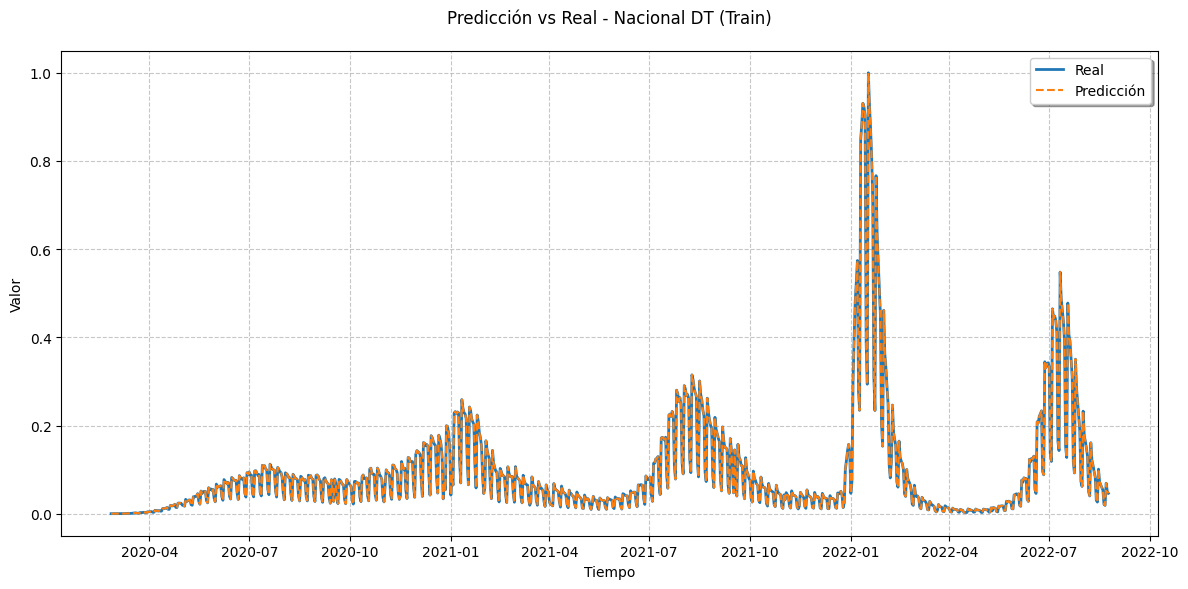

In [16]:
#Grafica de la predicción vs real DT
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_dt.index, pred_train_df_dt.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional DT (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

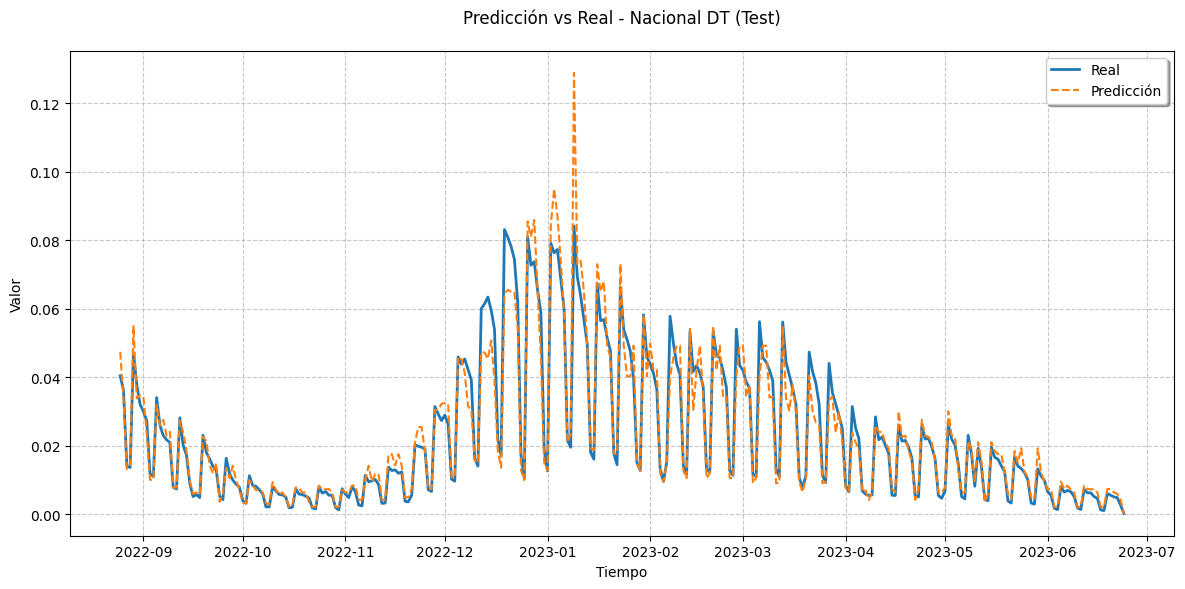

In [17]:
#Grafica de la predicción vs real DT
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_dt.index, pred_test_df_dt.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional DT (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
# Random forest
rf_regr = RandomForestRegressor()
param_search_rf_regr = {
    'criterion': ['squared_error', 'absolute_error', 'poisson'], #Puedo añadir 'friedman_mse',
    'n_estimators': [10, 50, 100, 200, None], # Puedo probar con [10, 50, 100, 200, 500]
    'max_depth': [3, 5, 7, 9, 15, 20, None]
}

# Utilizo GridSearchCV para encontrar los mejores parámetros
# Definir X (característica) y y (objetivo)
X = train_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]
y = train_data[['Nacional']]

grid_search_rf = GridSearchCV(estimator=rf_regr, param_grid=param_search_rf_regr, n_jobs=-1, cv=5, verbose=1)
grid_search_rf.fit(X, y)  # Entreno el modelo con la columna 'Nacional' como característica y los componentes principales como objetivo
best_params_rf = grid_search_rf.best_params_

print("==========================================================")
print("Mejores parámetros para Decision Tree Regressor:")
print(best_params_rf)
print("----------------------------------------------------------")

Fitting 5 folds for each of 105 candidates, totalling 525 fits
Mejores parámetros para Decision Tree Regressor:
{'criterion': 'absolute_error', 'max_depth': 9, 'n_estimators': 10}
----------------------------------------------------------


In [19]:
rf_optimo = grid_search_rf.best_estimator_
# === Ajustar el modelo RF con los datos de entrenamiento ===
rf_optimo.fit(X_train, Y_train)

# === Predicciones ===
train_pred_rf = rf_optimo.predict(X_train)  # Predecir 'Nacional' para train
test_pred_rf = rf_optimo.predict(X_test)    # Predecir 'Nacional' para test

# === Convertir a DataFrames para análisis ===
pred_train_df_rf = pd.DataFrame(train_pred_rf, columns=["Nacional"], index=X_train.index)
pred_test_df_rf = pd.DataFrame(test_pred_rf, columns=["Nacional"], index=X_test.index)

pred_train_df_rf.columns = ["Nacional"]
pred_test_df_rf.columns = ["Nacional"]

# Calcular estadísticas de los árboles individuales en el Random Forest
n_leaves_rf = [est.tree_.n_leaves for est in rf_optimo.estimators_]
n_nodes_rf = [est.tree_.node_count for est in rf_optimo.estimators_]
depths_rf = [est.get_depth() for est in rf_optimo.estimators_]

print(f"Número promedio de hojas (leaves): {np.mean(n_leaves_rf):.2f}")
print(f"Número promedio de nodos: {np.mean(n_nodes_rf):.2f}")
print(f"Profundidad promedio del árbol: {np.mean(depths_rf):.2f}")

Número promedio de hojas (leaves): 250.00
Número promedio de nodos: 499.00
Profundidad promedio del árbol: 9.00


In [20]:
rf_train_results = pd.DataFrame({
    "Real Nacional": train_data["Nacional"],
    "Pred. Nacional": pred_train_df_rf["Nacional"]
})
# Creo un dataframe con los resultados
rf_train_results["Residuals"] = rf_train_results["Real Nacional"] - rf_train_results["Pred. Nacional"]
# Residuos diferencia entre valor real y valor predicho (error del modelo).
rf_train_results["Rel. Error"] = (1 - (rf_train_results["Pred. Nacional"] / rf_train_results["Real Nacional"])).abs()
# Datos de prueba (test)
rf_test_pred = pred_test_df_rf["Nacional"]
rf_test_results = pd.DataFrame({
    "Real Nacional": test_data["Nacional"],
    "Pred. Nacional": rf_test_pred
})
rf_test_results["Residuals"] = rf_test_results["Real Nacional"] - rf_test_results["Pred. Nacional"]
rf_test_results["Rel. Error"] = (1 - (rf_test_results["Pred. Nacional"] / rf_test_results["Real Nacional"])).abs()

In [21]:
# Suppose your rf model is called 'rf'
rf_model = Model(rf_optimo)

# Load training data (X_train, Y_train)
rf_model.load_training(X_train, Y_train["Nacional"])

# Train the model (if not already trained)
rf_model.run_training()

# Get predictions for train and test
train_pred_rf = rf_model.predict(X_train)
test_pred_rf = rf_model.predict(X_test)

k_rf = sum([nodes - leaves for nodes, leaves in zip(n_nodes_rf, n_leaves_rf)]) # Estimación de k para Rf, adaptada a la que el profesor mencionó
# Evaluate metrics for train and test
train_metrics_rf = rf_model.regression_test_accuracy(X_train, Y_train["Nacional"], k=k_rf)
test_metrics_rf = rf_model.regression_test_accuracy(X_test, Y_test["Nacional"], k=k_rf)

print("Train metrics:", train_metrics_rf)
print("Test metrics:", test_metrics_rf)   

Train metrics: {'TSS': np.float64(14.650689888297807), 'RSS': np.float64(0.028046405650000005), 'SSR': np.float64(14.622643482647806), 'R2': np.float64(0.9980856597290751), 'MSE': np.float64(3.078639478594951e-05), 'RMSE': 0.0055485488901107745, 'MAPE': 0.0, 'MAE': np.float64(0.0029521624588364484), 'AIC': np.float64(5000.7768753866085), 'BIC': np.float64(26432.078552777322), 'TIME SERIES R2': np.float64(0.9980793278428428), 'APC': np.float64(5.633990918656957)}
Test metrics: {'TSS': np.float64(0.12287813015789481), 'RSS': np.float64(0.004069791749999999), 'SSR': np.float64(0.11880833840789481), 'R2': np.float64(0.9668794459618613), 'MSE': np.float64(1.3387472861842102e-05), 'RMSE': 0.003658889566773245, 'MAPE': np.float64(14.403788193570174), 'MAE': np.float64(0.002303552631578947), 'AIC': np.float64(5002.442382298638), 'BIC': np.float64(17646.6410858945), 'TIME SERIES R2': np.float64(0.9665482404214799), 'APC': np.float64(16.44537386683698)}


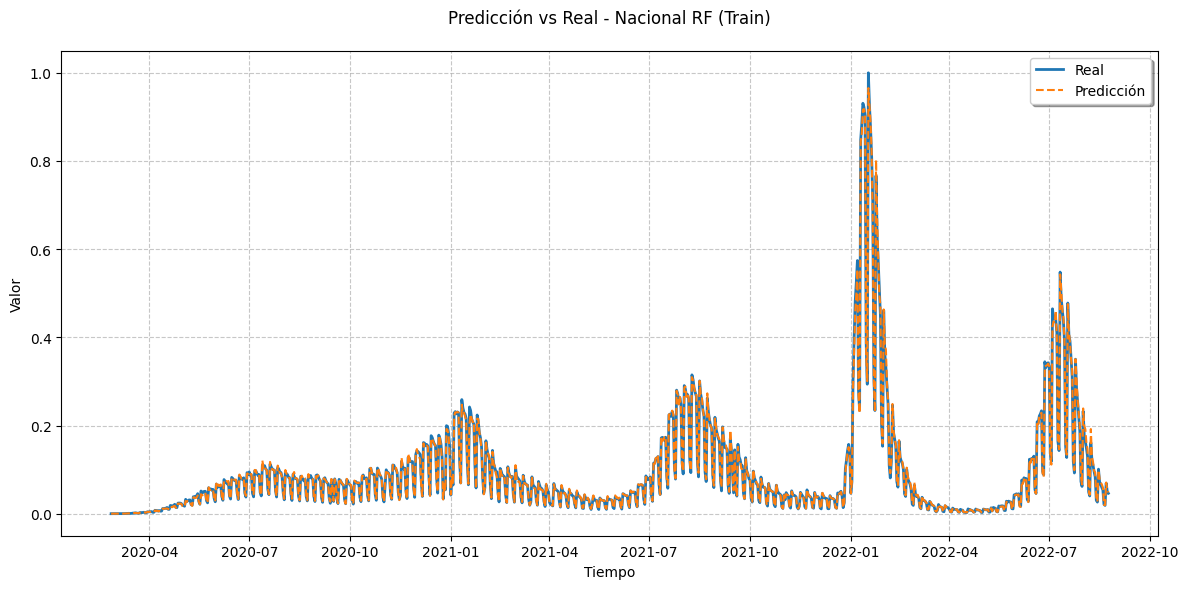

In [22]:
#Grafica de la predicción vs real RF Train
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_rf.index, pred_train_df_rf.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional RF (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [23]:
print(pred_test_df_rf.head(10))

            Nacional
date                
2022-08-25  0.043725
2022-08-26  0.035670
2022-08-27  0.013685
2022-08-28  0.015280
2022-08-29  0.046910
2022-08-30  0.035680
2022-08-31  0.035590
2022-09-01  0.029990
2022-09-02  0.027555
2022-09-03  0.010380


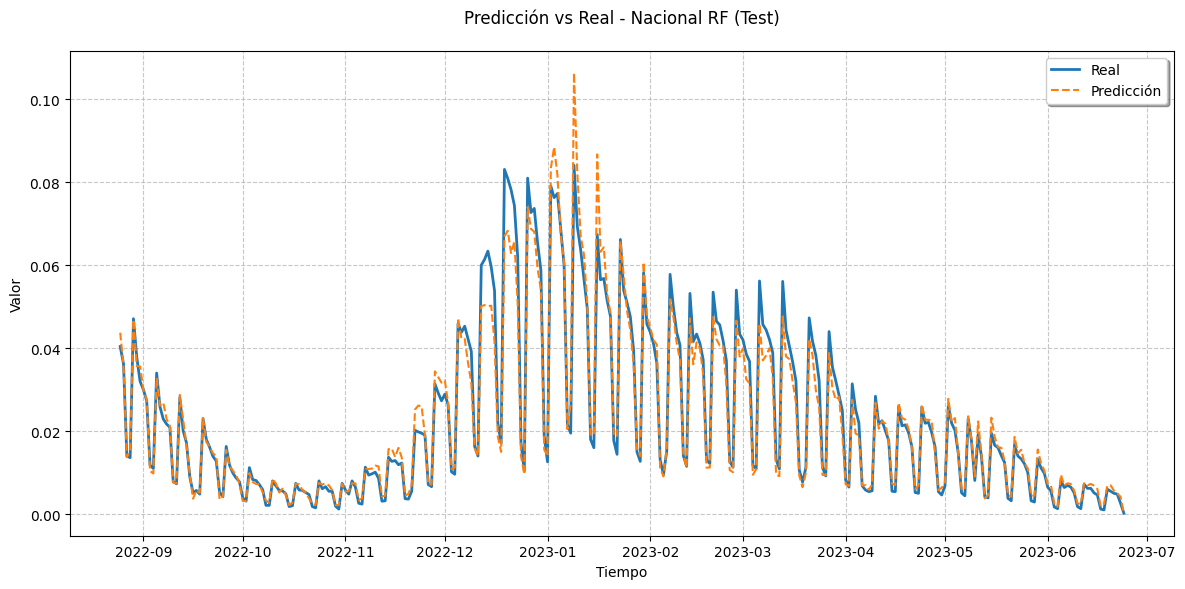

In [24]:
#Grafica de la predicción vs real RF Test
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_rf.index, pred_test_df_rf.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional RF (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
# Support Vector Machine
svm_regr = svm.SVR()
param_search_svm_regr = {
    'kernel': ['rbf', 'poly', 'sigmoid'],# , 'poly', 'rbf', 'sigmoid' linear
    'degree': [2, 3, 4, 5],  # 3, 4, 5, 6
    #'C': [0.1, 1, 10], # Puedo probar con [0.001, 0.01, 0.1, 1]
    'gamma': ['scale', 'auto'],
    'epsilon': [0.005, 0.05, 0.1, 0.2, 0.5],
    'max_iter': [-1]     # Número máximo de iteraciones
}

# Utilizo GridSearchCV para encontrar los mejores parámetros
# Definir X (característica) y Y (objetivo)
X = train_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]
y = train_data[['Nacional']]

grid_search_svm = GridSearchCV(estimator=svm_regr, param_grid=param_search_svm_regr, n_jobs=-1, cv=5, verbose=1)
grid_search_svm.fit(X, y)  # Entreno el modelo con los componentes principales como característica y la columna 'Nacional' como objetivo
best_params_svm = grid_search_svm.best_params_

print("==========================================================")
print("Mejores parámetros para Support Vector Machine Regressor:")
print(best_params_svm)
print("----------------------------------------------------------")

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Mejores parámetros para Support Vector Machine Regressor:
{'degree': 2, 'epsilon': 0.005, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1}
----------------------------------------------------------


In [26]:
svm_optimo = grid_search_svm.best_estimator_
# === Ajustar el modelo SVM con los datos de entrenamiento ===
svm_optimo.fit(X_train, Y_train)

# === Predicciones ===
train_pred_svm = svm_optimo.predict(X_train)  # Predecir 'Nacional' para train
test_pred_svm = svm_optimo.predict(X_test)    # Predecir 'Nacional' para test

# === Convertir a DataFrames para análisis ===
pred_train_df_svm = pd.DataFrame(train_pred_svm, columns=["Nacional"], index=X_train.index)
pred_test_df_svm = pd.DataFrame(test_pred_svm, columns=["Nacional"], index=X_test.index)

pred_train_df_svm.columns = ["Nacional"]
pred_test_df_svm.columns = ["Nacional"]

In [27]:
# Suppose your svm model is called 'svm'
svm_model = Model(svm_optimo)

# Load training data (X_train, Y_train)
svm_model.load_training(X_train, Y_train["Nacional"])

# Train the model (if not already trained)
svm_model.run_training()

# Get predictions for train and test
train_pred_svm = svm_model.predict(X_train)
test_pred_svm = svm_model.predict(X_test)

k_svm = len(svm_optimo.support_vectors_) # Estimación de k para SVM, otorgada por el profesor
# Evaluate metrics for train and test
train_metrics_svm = svm_model.regression_test_accuracy(X_train, Y_train["Nacional"], k=k_svm)
test_metrics_svm = svm_model.regression_test_accuracy(X_test, Y_test["Nacional"], k=k_svm)

print("Train metrics:", train_metrics_svm)
print("Test metrics:", test_metrics_svm)  

Train metrics: {'TSS': np.float64(14.755372095961423), 'RSS': np.float64(0.062173882623258354), 'SSR': np.float64(14.693198213338166), 'R2': np.float64(0.9957863561678478), 'MSE': np.float64(6.82479501901848e-05), 'RMSE': 0.008261231759863949, 'MAPE': np.float64(inf), 'MAE': np.float64(0.005298629512831529), 'AIC': 585.1847263163874, 'BIC': 10667.158477039007, 'TIME SERIES R2': np.float64(0.9957724190879179), 'APC': 0.8706421921113499}
Test metrics: {'TSS': np.float64(0.09818617778178937), 'RSS': np.float64(0.006522584834108625), 'SSR': np.float64(0.09166359294768074), 'R2': np.float64(0.9335692153267792), 'MSE': np.float64(2.1455871164831002e-05), 'RMSE': 0.004632048268836477, 'MAPE': np.float64(55.35672110036979), 'MAE': np.float64(0.0037655746575134853), 'AIC': 587.4990244721299, 'BIC': 4885.770559261706, 'TIME SERIES R2': np.float64(0.932904907480047), 'APC': 1.9426046264850008}


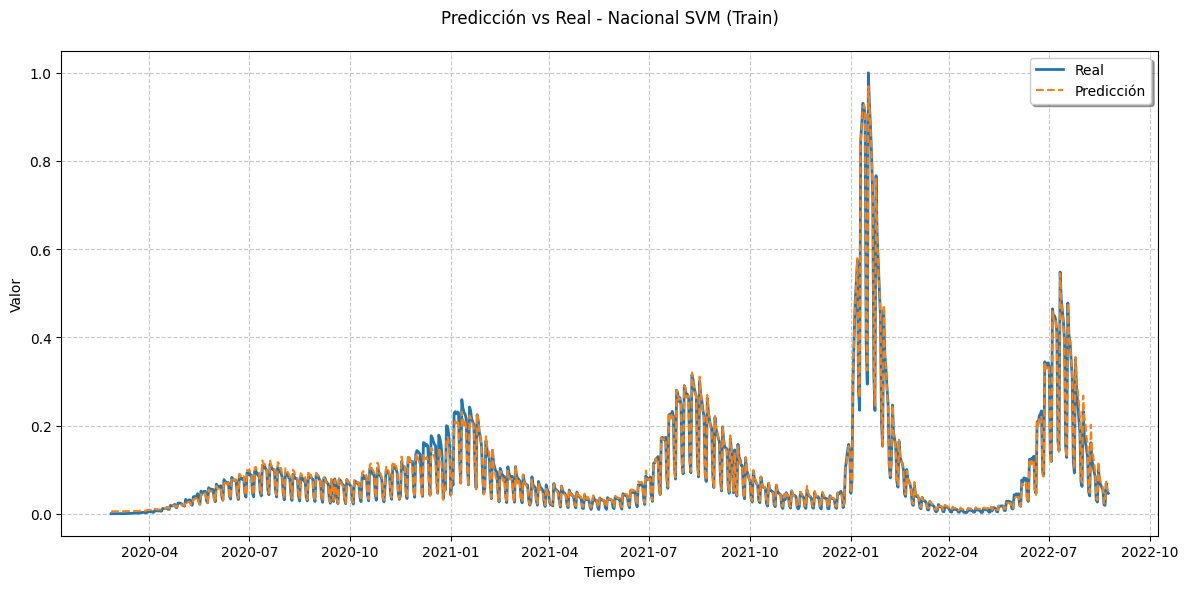

In [28]:
#Grafica de la predicción vs real SVM Train
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_svm.index, pred_train_df_svm.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional SVM (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

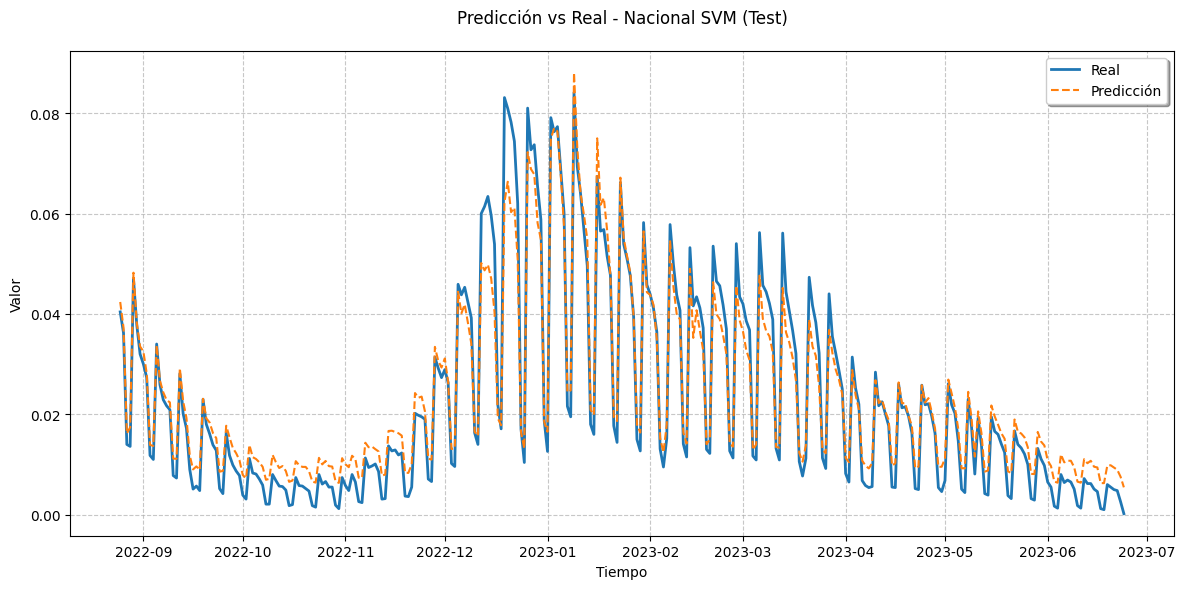

In [29]:
#Grafica de la predicción vs real SVM Test
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_svm.index, pred_test_df_svm.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional SVM (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:

print(pred_test_df_svm.head(10))

            Nacional
date                
2022-08-25  0.042377
2022-08-26  0.037262
2022-08-27  0.016173
2022-08-28  0.017400
2022-08-29  0.048211
2022-08-30  0.038221
2022-08-31  0.033518
2022-09-01  0.032490
2022-09-02  0.028145
2022-09-03  0.013894


In [31]:
print(Y_test.head(10))

            Nacional
date                
2022-08-25    0.0404
2022-08-26    0.0362
2022-08-27    0.0140
2022-08-28    0.0136
2022-08-29    0.0471
2022-08-30    0.0378
2022-08-31    0.0320
2022-09-01    0.0300
2022-09-02    0.0273
2022-09-03    0.0118


In [32]:
# Multi-layer Perceptron Regressor
mlp_regr = MLPRegressor()
param_search_mlp_regr = {
    'random_state': [1, None],  # Fijo el estado aleatorio para reproducibilidad
    'max_iter': [1000, 2000, 3000],  # Puedo probar con [1000, 2000, 3000, 4000]
    'tol': [0.01, 0.1, 0.2],  # Puedo probar con [0.01, 0.05, 0.1, 0.2]
    'hidden_layer_sizes': [(50,), (100,), (150,), (200,)],  # Puedo probar con [(50,), (100,), (150,), (200,), (250,)]
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Puedo probar con ['constant', 'invscaling', 'adaptive']
}

# Utilizo GridSearchCV para encontrar los mejores parámetros
# Definir X (característica) y y (objetivo)
X = train_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]
y = train_data[['Nacional']]

# Le paso este objeto a la funcion de model_template y tambien le paso X Y
grid_search_mlp = GridSearchCV(estimator=mlp_regr, param_grid=param_search_mlp_regr, n_jobs=-1, cv=5, verbose=1)
grid_search_mlp.fit(X, y)  # Entreno el modelo con los componentes principales como característica y la columna 'Nacional' como objetivo
best_params_mlp = grid_search_mlp.best_params_

print("==========================================================")
print("Mejores parámetros para Multi-layer Perceptron Regressor:")
print(best_params_mlp)
print("----------------------------------------------------------")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores parámetros para Multi-layer Perceptron Regressor:
{'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'max_iter': 3000, 'random_state': None, 'tol': 0.01}
----------------------------------------------------------


In [33]:
mlp_optimo = grid_search_mlp.best_estimator_
# === Ajustar el modelo MLP con los datos de entrenamiento ===
mlp_optimo.fit(X_train, Y_train)

# === Predicciones ===
train_pred_mlp = mlp_optimo.predict(X_train)  # Predecir 'Nacional' para train
test_pred_mlp = mlp_optimo.predict(X_test)    # Predecir 'Nacional' para test

# === Convertir a DataFrames para análisis ===
pred_train_df_mlp = pd.DataFrame(train_pred_mlp, columns=["Nacional"], index=X_train.index)
pred_test_df_mlp = pd.DataFrame(test_pred_mlp, columns=["Nacional"], index=X_test.index)

pred_train_df_mlp.columns = ["Nacional"]
pred_test_df_mlp.columns = ["Nacional"]

# Función para analizar el tamaño de la red neuronal MLP para saber cuando mide su k
def analyze_network_size(mlp_model):
    """
    Analisis del tamaño de una red neuronal MLP y la categoriza en pequeña, mediana o grande.
    """
    # Get network parameters
    n_layers = len(mlp_model.coefs_)
    n_neurons = [layer.shape[0] for layer in mlp_model.coefs_]
    total_params = sum(layer.size for layer in mlp_model.coefs_)
    
    # Size categorization
    if total_params < 1000:
        size_category = "Pequeña"
    elif total_params < 100000:
        size_category = "Mediana"
    else:
        size_category = "Grande"
    
    print(f"Arquitectura de la Red Neuronal:")
    print(f"Número de capas: {n_layers}")
    print(f"Neuronas por capa: {n_neurons}")
    print(f"Total de parámetros: {total_params:,}")
    print(f"Categoría de la red en base a su tamaño: {size_category}")
    
# Use after training your model
analyze_network_size(mlp_optimo)

Arquitectura de la Red Neuronal:
Número de capas: 2
Neuronas por capa: [3, 150]
Total de parámetros: 600
Categoría de la red en base a su tamaño: Pequeña


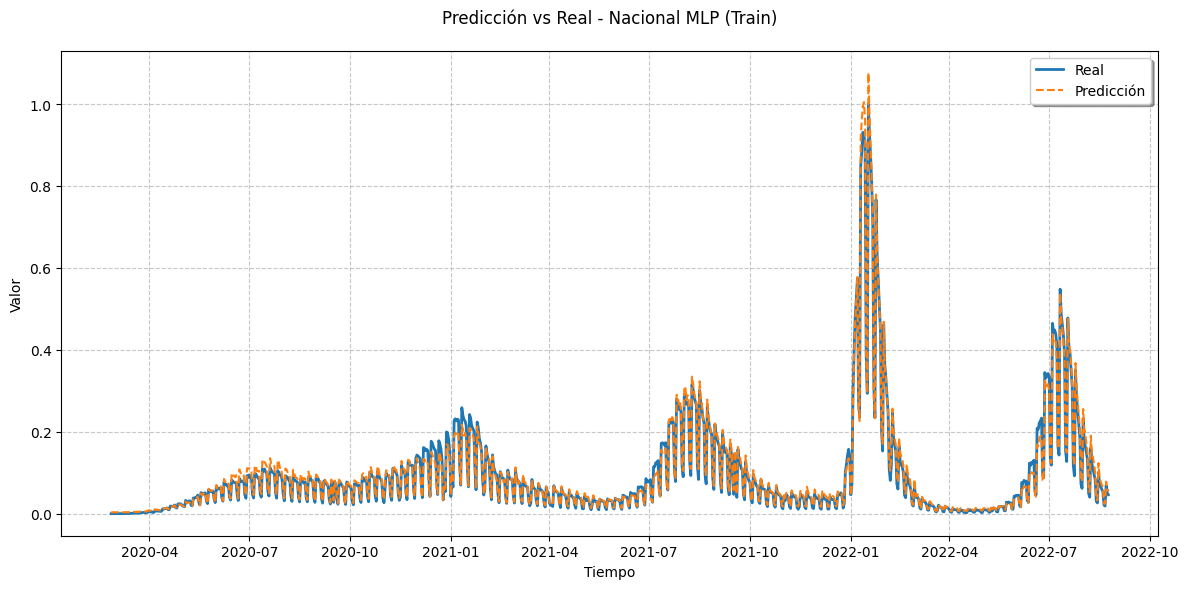

In [34]:
#Grafica de la predicción vs real MLP Train
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_mlp.index, pred_train_df_mlp.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional MLP (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

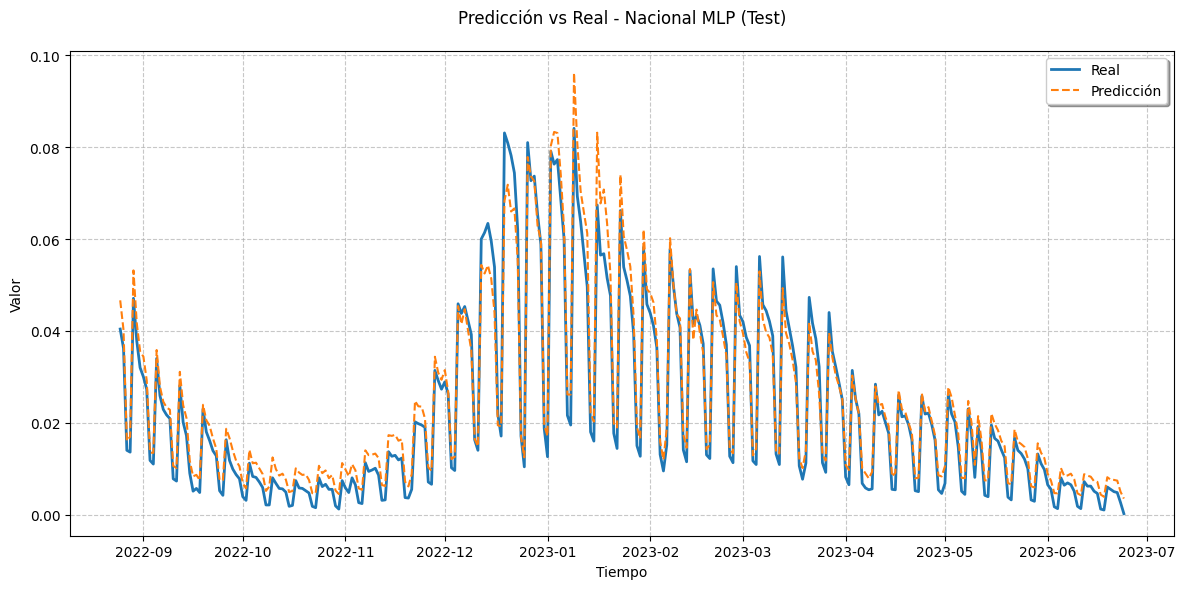

In [35]:
#Grafica de la predicción vs real MLP Test
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_mlp.index, pred_test_df_mlp.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional MLP (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
# Suppose your MLP model is called 'mlp'
mlp_model = Model(mlp_optimo)

# Load training data (X_train, Y_train)
mlp_model.load_training(X_train, Y_train["Nacional"])

# Train the model (if not already trained)
mlp_model.run_training()

# Get predictions for train and test
train_pred_mlp = mlp_model.predict(X_train)
test_pred_mlp = mlp_model.predict(X_test)

# Red pequeña: k≈50, Red mediana: k≈100–200, Red grande: k>500
# Evaluate metrics for train and test
train_metrics_mlp = mlp_model.regression_test_accuracy(X_train, Y_train["Nacional"], k=50)
test_metrics_mlp = mlp_model.regression_test_accuracy(X_test, Y_test["Nacional"], k=50)

print("Train metrics:", train_metrics_mlp)
print("Test metrics:", test_metrics_mlp)            

Train metrics: {'TSS': np.float64(15.312855473002712), 'RSS': np.float64(0.09078589512115007), 'SSR': np.float64(15.22206957788156), 'R2': np.float64(0.9940712628496227), 'MSE': np.float64(9.965520869500557e-05), 'RMSE': 0.00998274554894622, 'MAPE': np.float64(inf), 'MAE': np.float64(0.00681115501348652), 'AIC': 118.42758848555361, 'BIC': 8734.493700032668, 'TIME SERIES R2': np.float64(0.9940516529141749), 'APC': 0.4110764622985834}
Test metrics: {'TSS': np.float64(0.12996685166216437), 'RSS': np.float64(0.005311147739454887), 'SSR': np.float64(0.12465570392270948), 'R2': np.float64(0.9591345972336033), 'MSE': np.float64(1.7470880721891074e-05), 'RMSE': 0.004179818264218084, 'MAPE': np.float64(30.53052534520378), 'MAE': np.float64(0.0033751997643019995), 'AIC': 121.90995004340174, 'BIC': 3616.1637916673744, 'TIME SERIES R2': np.float64(0.9587259432059393), 'APC': 0.4018249900854215}


In [48]:
# Prepare metrics for plotting
models = ['Decision Tree', 'Random Forest', 'SVM', 'MLP']
train_metrics_list = [train_metrics_dt, train_metrics_rf, train_metrics_svm, train_metrics_mlp]
test_metrics_list = [test_metrics_dt, test_metrics_rf, test_metrics_svm, test_metrics_mlp]

# Select metrics to compare
metrics_to_plot = ['MSE', 'RMSE', 'MAPE', 'MAE', 'R2', 'TSS', 'RSS', 'SSR', 'AIC', 'BIC', 'APC', 'TIME SERIES R2']

# Prepare data for train metrics
train_metrics_df = pd.DataFrame(
    {model: {metric: train_metrics[metric] for metric in metrics_to_plot} 
     for model, train_metrics in zip(models, train_metrics_list)}
).T

# Prepare data for test metrics
test_metrics_df = pd.DataFrame(
    {model: {metric: test_metrics[metric] for metric in metrics_to_plot} 
     for model, test_metrics in zip(models, test_metrics_list)}
).T


In [49]:
# Create DataFrames for train and test metrics, each row is a model, columns are metrics
train_metrics_summary = pd.DataFrame(
    [train_metrics_dt, train_metrics_rf, train_metrics_svm, train_metrics_mlp],
    index=['Decision Tree', 'Random Forest', 'SVM', 'MLP']
)

test_metrics_summary = pd.DataFrame(
    [test_metrics_dt, test_metrics_rf, test_metrics_svm, test_metrics_mlp],
    index=['Decision Tree', 'Random Forest', 'SVM', 'MLP']
)

print("Train Metrics Summary:")
print(train_metrics_summary)
print("\nTest Metrics Summary:")
print(test_metrics_summary)

Train Metrics Summary:
                     TSS       RSS        SSR        R2           MSE  \
Decision Tree  14.865981  0.000013  14.865968  0.999999  1.471012e-08   
Random Forest  14.650690  0.028046  14.622643  0.998086  3.078639e-05   
SVM            14.755372  0.062174  14.693198  0.995786  6.824795e-05   
MLP            15.312855  0.090786  15.222070  0.994071  9.965521e-05   

                   RMSE  MAPE       MAE          AIC           BIC  \
Decision Tree  0.000121   0.0  0.000017  1736.069461  22222.000805   
Random Forest  0.005549   0.0  0.002952  5000.776875  26432.078553   
SVM            0.008261   inf  0.005299   585.184726  10667.158477   
MLP            0.009983   inf  0.006811   118.427588   8734.493700   

               TIME SERIES R2       APC  
Decision Tree        0.999999  1.869742  
Random Forest        0.998079  5.633991  
SVM                  0.995772  0.870642  
MLP                  0.994052  0.411076  

Test Metrics Summary:
                    TSS    

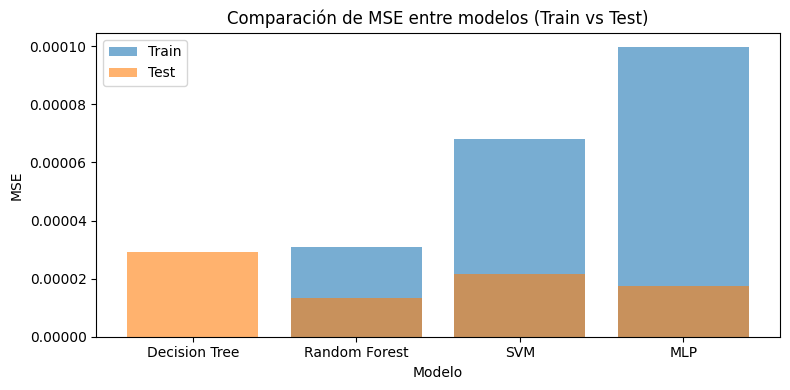

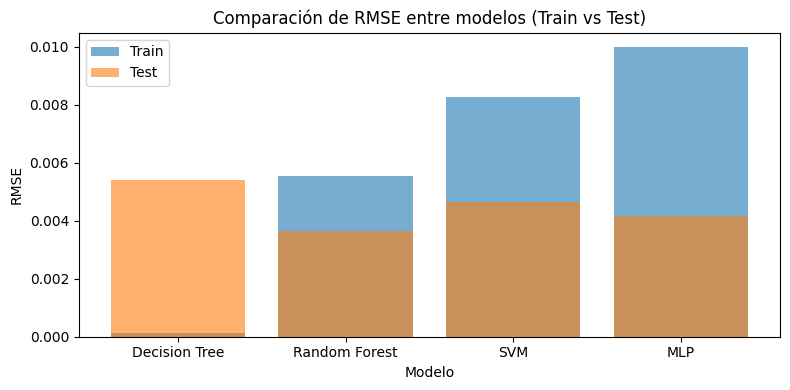

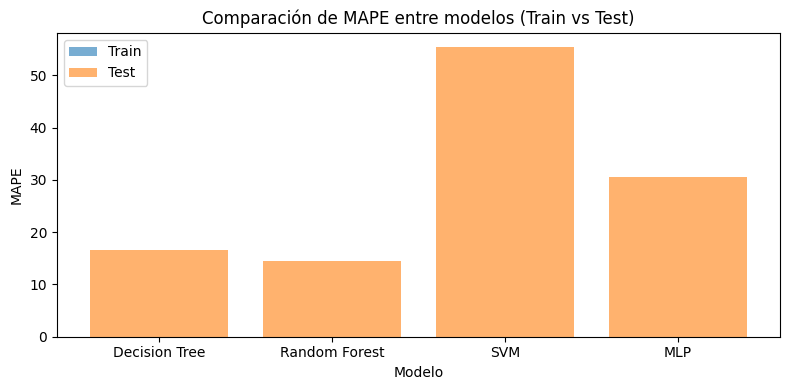

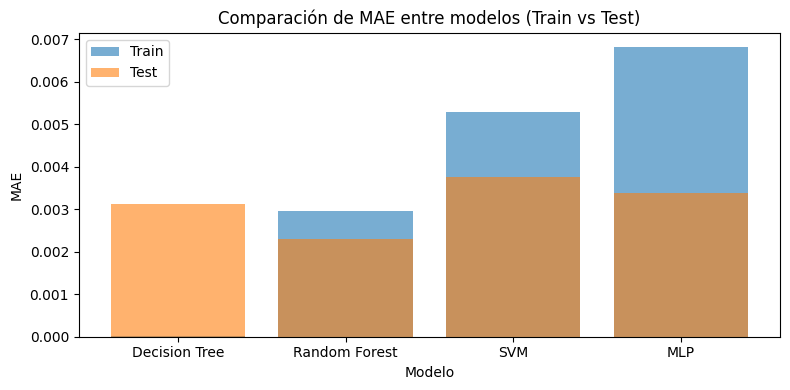

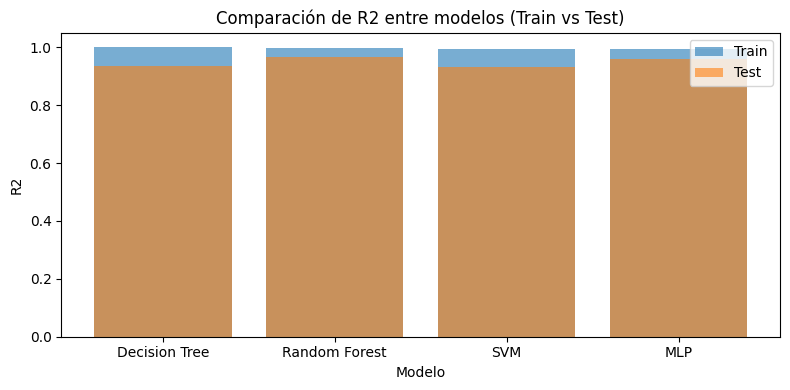

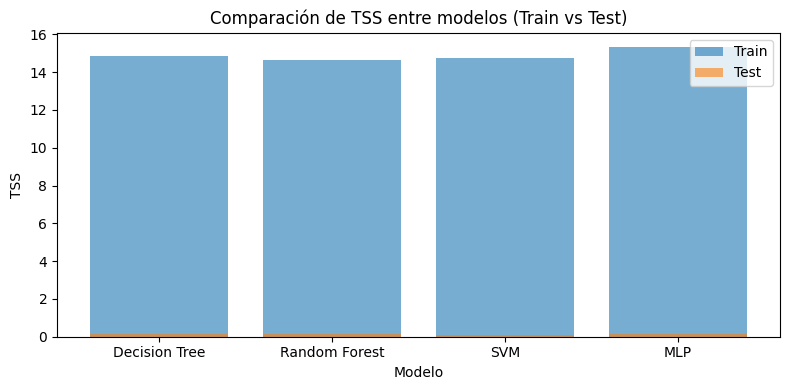

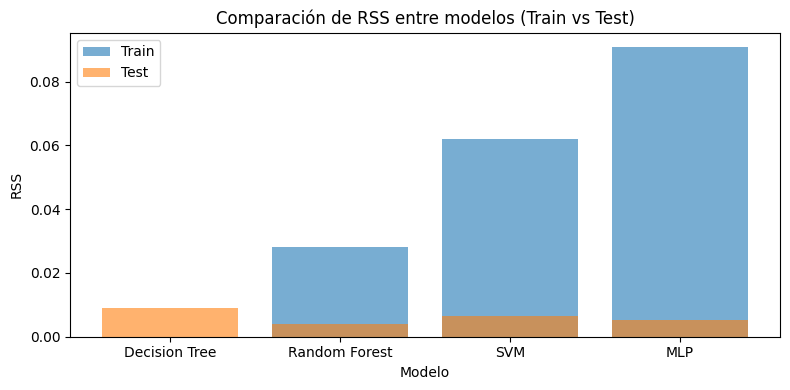

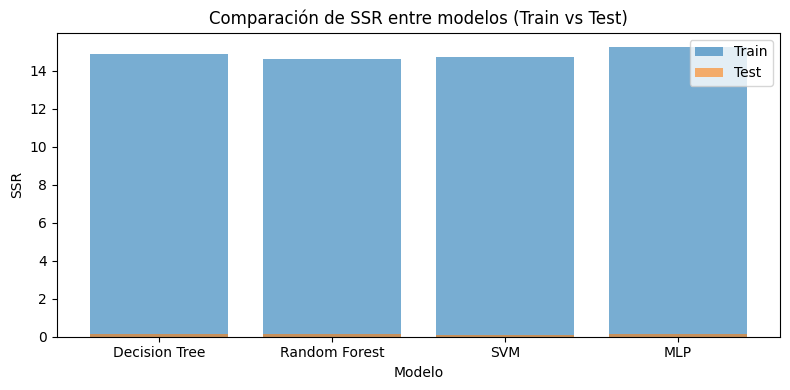

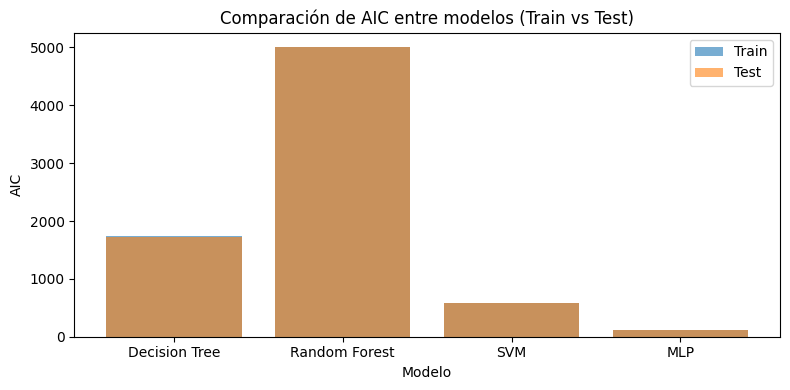

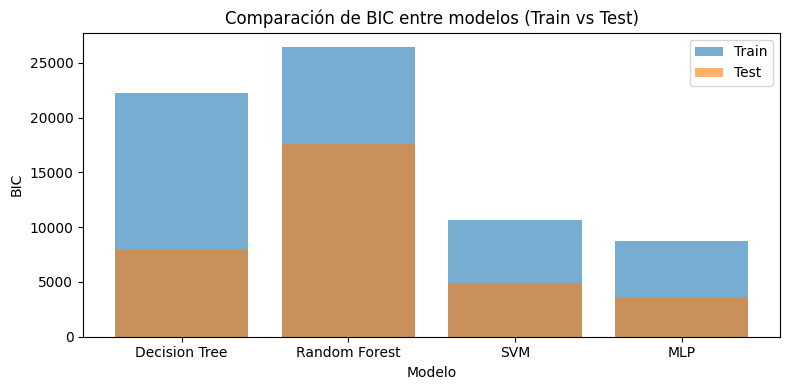

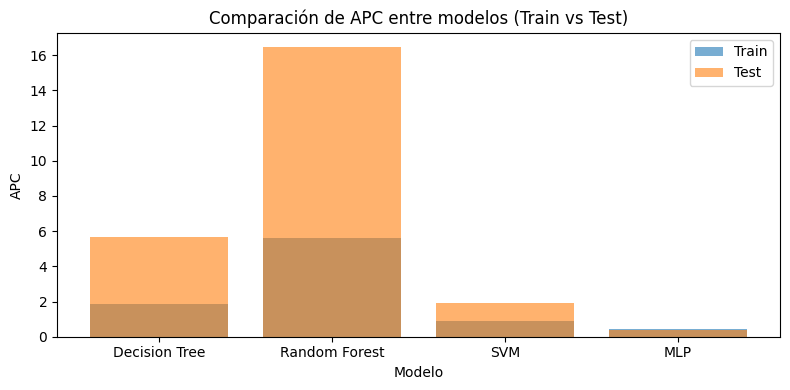

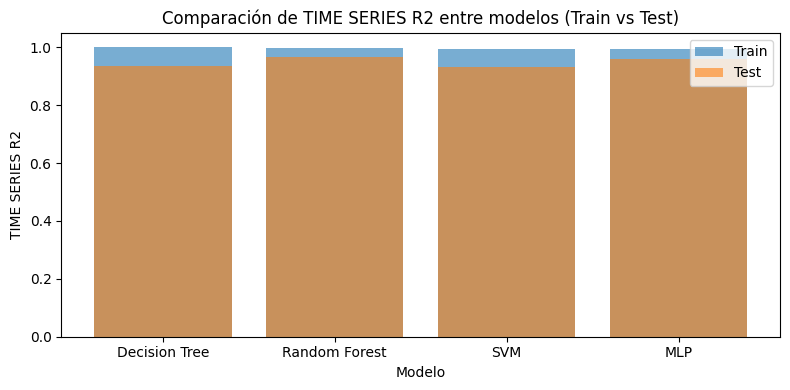

In [47]:
# Plot each metric for train and test
for metric in metrics_to_plot:
    plt.figure(figsize=(8, 4))
    plt.bar(train_metrics_df.index, train_metrics_df[metric], alpha=0.6, label='Train')
    plt.bar(test_metrics_df.index, test_metrics_df[metric], alpha=0.6, label='Test')
    plt.title(f'Comparación de {metric} entre modelos (Train vs Test)')
    plt.ylabel(metric)
    plt.xlabel('Modelo')
    plt.legend()
    plt.tight_layout()
    plt.show()